In [27]:
import NormalDataParserPy
import pandas as pd
import numpy as np

marketDataCpp = NormalDataParserPy.orderBooksWithDepth()
marketDataCpp.query_filter.exchange_vec = ['ICE_CHC'];
marketDataCpp.query_filter.date_vec = ['01252018']
marketDataCpp.query_filter.symbols_vec = ['SB  FMH0018-SB  FMK0018']
marketDataPy = marketDataCpp.get(num_of_levels = 5, numOrderIdsPerLevel = 500)

Querying data from the database...

Snapshot Started...security Id: 5206269
	01/25/18 03:00:19 (51_916_530 nsec) - local time
Snapshot Completed...security Id: 5206269
	01/25/18 03:00:19 (64_847_250 nsec) - local time
Total Rows Processed: 61437

!!!!!!!!!!!!! Packet Fetching FINIHSED SUCCESSFULLY !!!!!!!!!!!!!


In [28]:
t_time = pd.DatetimeIndex(pd.to_datetime(marketDataPy.protocol_message_time)).tz_localize('UTC').tz_convert('US/Central').tz_localize(None)
print 'TOTAL: ' + str(len(t_time)) + ' events'

df = pd.DataFrame({'t_time' : t_time,
    'bid_orders' : marketDataPy.bid_orders[:,0], 'bid_size': marketDataPy.bid_size[:,0], 'bid_price': marketDataPy.bid_price[:,0],
    'ask_price': marketDataPy.ask_price[:,0], 'ask_size': marketDataPy.ask_size[:,0], 'ask_orders' : marketDataPy.ask_orders[:,0],
    'trade_size': marketDataPy.trade_size},
    columns = ['t_time', 'trade_size', 'bid_orders', 'bid_size', 'bid_price', 'ask_price', 'ask_size', 'ask_orders'])

TOTAL: 46331 events


In [35]:
TIMESTAMP_INDEX = 700
df.iloc[TIMESTAMP_INDEX:].head()

,t_time,trade_size,bid_orders,bid_size,bid_price,ask_price,ask_size,ask_orders
700,2018-01-25 03:01:01.140669008,0,7,69,-130.0,-120.0,445,35
701,2018-01-25 03:01:01.141000000,0,7,69,-130.0,-120.0,442,34
702,2018-01-25 03:01:01.141372003,0,7,70,-130.0,-120.0,442,34
703,2018-01-25 03:01:01.141470003,0,7,75,-130.0,-120.0,442,34
704,2018-01-25 03:01:01.141503001,0,7,74,-130.0,-120.0,442,34


2018-01-09 09:59:31.555958002


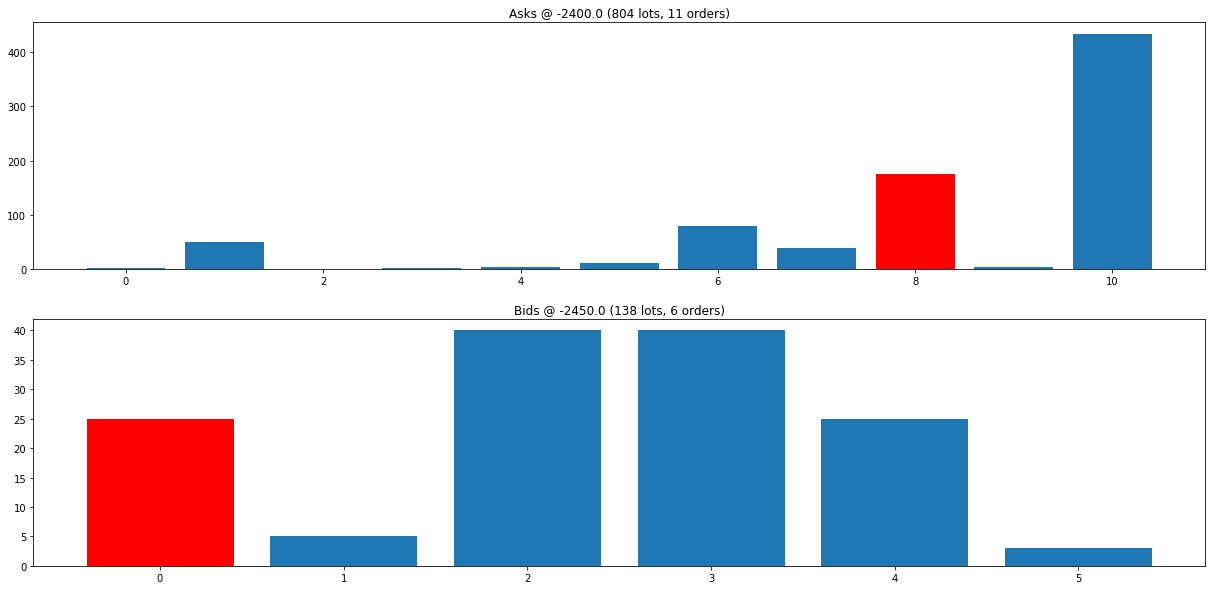

In [4]:
bid_order_sizes, bid_order_ids, bid_order_our = ([] for i in range(3))
for i in range(marketDataPy.bid_orders[TIMESTAMP_INDEX][0]):
    bid_order_ids.append(marketDataPy.bid_orders_ids[TIMESTAMP_INDEX][i])
    bid_order_sizes.append(marketDataPy.bid_orders_ids_size[TIMESTAMP_INDEX][i])
    bid_order_our.append(marketDataPy.bid_orders_ids_size[TIMESTAMP_INDEX][i]
        if marketDataPy.bid_orders_ids_tmg[TIMESTAMP_INDEX][i] == 1 else 0)

ask_order_sizes, ask_order_ids, ask_order_our = ([] for i in range(3))
for i in range(marketDataPy.ask_orders[TIMESTAMP_INDEX][0]):
    ask_order_ids.append(marketDataPy.ask_orders_ids[TIMESTAMP_INDEX][i])
    ask_order_sizes.append(marketDataPy.ask_orders_ids_size[TIMESTAMP_INDEX][i])
    ask_order_our.append(marketDataPy.ask_orders_ids_size[TIMESTAMP_INDEX][i]
        if marketDataPy.ask_orders_ids_tmg[TIMESTAMP_INDEX][i] == 1 else 0)
        
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(21,10))

plt.subplot(211)
plt.bar(range(len(ask_order_sizes)), ask_order_sizes)
plt.bar(range(len(ask_order_sizes)), ask_order_our, color='r')
plt.title('Asks @ ' + str(marketDataPy.ask_price[TIMESTAMP_INDEX][0]) + ' (' + str(np.sum(ask_order_sizes)) + ' lots, ' + str(len(ask_order_sizes)) + ' orders)')

plt.subplot(212)
plt.bar(range(len(bid_order_sizes)), bid_order_sizes)
plt.bar(range(len(bid_order_sizes)), bid_order_our, color='r')
plt.title('Bids @ ' + str(marketDataPy.bid_price[TIMESTAMP_INDEX][0]) + ' (' + str(np.sum(bid_order_sizes)) + ' lots, ' + str(len(bid_order_sizes)) + ' orders)')

print df.iloc[TIMESTAMP_INDEX].t_time
plt.show()

/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


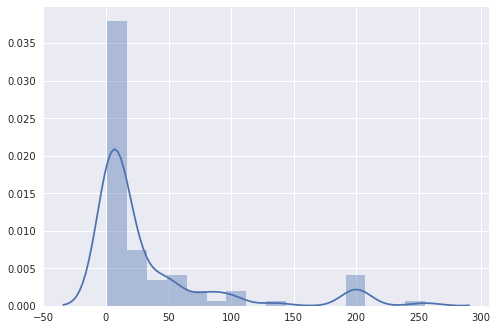

In [6]:
import seaborn as sns
sns.distplot(ask_order_sizes)